In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG',
    'JD', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SAM',
    'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TMUS', 
    'TREX', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL',
    'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'APT', 'BRTX', 'BTTR', 'BYRN', 'CENN', 'CGAU',
    'CHEF', 'CIZN', 'COOP', 'CTGO', 'CVE', 'DQ', 'DTST', 'DYAI', 'EP',
    'ESOA', 'FCUV', 'FKWL', 'FSI', 'GGE', 'GME', 'HBM', 'HMY', 'HNRG',
    'IDR', 'INTZ',  'KREF', 'MCVT', 'MICS', 'MNMD', 'MOBQ', 'NAN',
    'OMQS', 'PACB', 'PETV', 'POWW', 'PRPH', 'RVP', 'RVYL', 'SOBR',
    'VIRT', 'WAVD', 'WKHS', 'ZEST', 'ZYXI']
BEST_WEIGHTED = [
    'ABST', 'AGI', 'CEF', 'CFFN', 'ERIE', 'FCN', 'FNV', 'FRBA', 'GCBC', 
    'IEI', 'IIM', 'LFMD', 'MIY', 'MMU', 'MTA', 'NAZ', 'NUO', 'SAL', 'YORW']

INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-12-24', datetime.date(2022, 12, 24))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  157 of 157 completed
Generating derived columns...
AAPL... ABMD... ABNB... ABST... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BRTX... BTTR... BYND... BYRN... CEF... CENN... CFFN... CGAU... CHEF... CHWY... CIZN... COOP... CRWD... CTGO... CVE... DDOG... DGX... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EDIT... EP... ERIE... ESOA... ETSY... FCN... FCUV... FKWL... FLGT... FNV... FRBA... FSI... FTNT... GCBC... GGE... GH... GME... GMED... GOOG... HBM... HMY... HNRG... IDR... IDXX... IEI... IIM... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MIY... MMU... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... NAN... NAZ... NET... NOW... NUO... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN..

In [5]:
data['Date'].tail()

2514   2022-12-19
2515   2022-12-20
2516   2022-12-21
2517   2022-12-22
2518   2022-12-23
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.995213
2       0.998782
3       0.988950
4       1.016942
5       1.025403
          ...   
2514    0.990992
2515    1.001037
2516    1.014868
2517    0.985548
2518    1.005868
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.000000
2,1.003898
3,1.000000
4,1.021946
5,1.031813
...,...
2514,0.996284
2515,1.013499
2516,1.026283
2517,0.996765


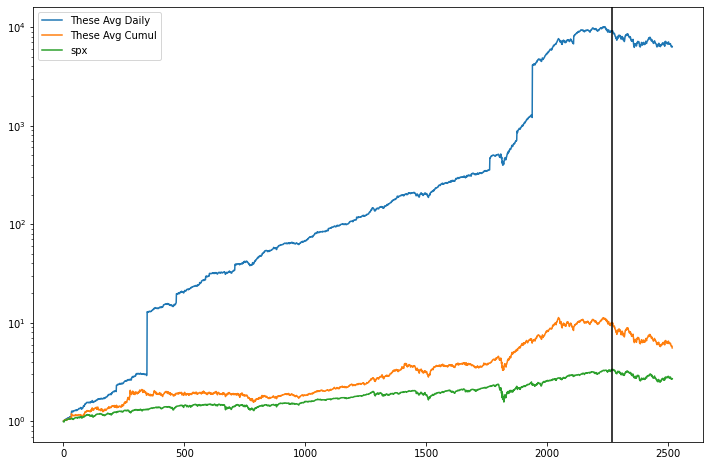

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-12-24,NaN,NaN
1,2012-12-26,1.003723,1.003723
2,2012-12-27,1.006620,1.006549
3,2012-12-28,1.007195,1.005908
4,2012-12-31,1.019509,1.018067


In [10]:
out.tail()

,Date,mine1,mine2
2514,2022-12-19,6333.608999,5.790721
2515,2022-12-20,6327.415083,5.762965
2516,2022-12-21,6435.054198,5.842724
2517,2022-12-22,6302.878494,5.672417
2518,2022-12-23,6297.328762,5.549819


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

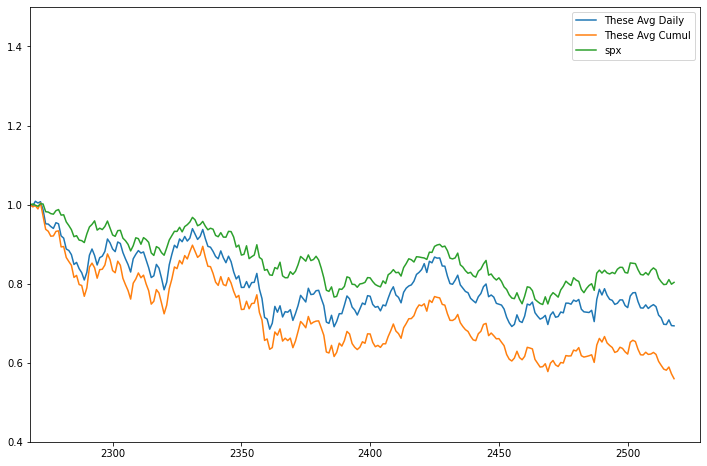

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2459,56.049999,56.049999,56.740002,53.529999,53.799999,4.026244,1.041822,1.045124,1.003170
2460,55.290001,55.290001,56.000000,53.299999,55.345001,4.012592,0.999006,0.986441,0.987422
2461,60.669998,60.669998,60.869999,56.959999,56.959999,4.105449,1.065133,1.097305,1.030204
2462,60.500000,60.500000,60.880001,58.145000,60.000000,4.102643,1.008333,0.997198,0.988957
2463,61.919998,61.919998,62.560001,59.849998,59.849998,4.125843,1.034586,1.023471,0.989256


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2459,56.049999,56.049999,56.740002,53.529999
2460,55.290001,55.290001,56.000000,53.299999
2461,60.669998,60.669998,60.869999,56.959999
2462,60.500000,60.500000,60.880001,58.145000
2463,61.919998,61.919998,62.560001,59.849998


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2459,56.049999,56.049999,56.740002,53.529999,56.000000,53.299999,0.999108,0.950937
2460,55.290001,55.290001,56.000000,53.299999,60.869999,56.959999,1.100922,1.030204
2461,60.669998,60.669998,60.869999,56.959999,60.880001,58.145000,1.003461,0.958381
2462,60.500000,60.500000,60.880001,58.145000,62.560001,59.849998,1.034050,0.989256
2463,61.919998,61.919998,62.560001,59.849998,61.200001,59.529999,0.988372,0.961402


0.05    0.977712
Name: HighMult, dtype: float64


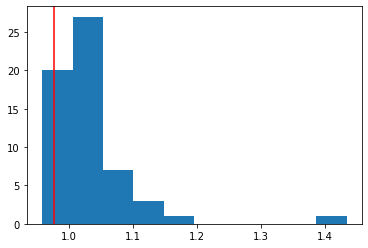

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0317056125738366


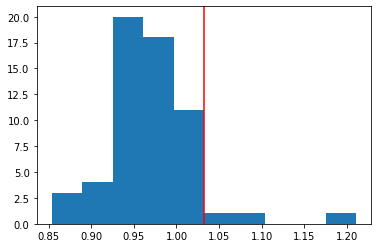

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0317056125738366, 0.9777122957569568)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0128013800734783, 0.9896177818432456)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2459,56.049999,56.049999,56.740002,53.529999,56.000000,53.299999,0.999108,0.950937,0
2460,55.290001,55.290001,56.000000,53.299999,60.869999,56.959999,1.100922,1.030204,0
2461,60.669998,60.669998,60.869999,56.959999,60.880001,58.145000,1.003461,0.958381,1
2462,60.500000,60.500000,60.880001,58.145000,62.560001,59.849998,1.034050,0.989256,1
2463,61.919998,61.919998,62.560001,59.849998,61.200001,59.529999,0.988372,0.961402,1


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0064927229743923,
 0.9859220715884085,
 1.0628089219925165,
 0.9741350708780904)

In [27]:
get_hilo_mults(aapl)

(1.0083790419753855,
 0.9874494614663779,
 1.0090425228269144,
 0.9901106470285606)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.008379,0.987449,1.009043,0.990111
1,ABMD,1.002144,0.997181,1.008672,1.000000
2,ABNB,0.993104,0.987972,1.017740,0.982851
3,ABST,0.995656,0.995590,1.005779,0.995637
4,ACN,1.002683,0.990287,1.017428,0.989005


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,131.860001,AAPL
ABMD,NaN,ABMD
ABNB,85.25,ABNB
ABST,9.79,ABST
ACN,266.089996,ACN
...,...,...
ZM,65.889999,ZM
ZYXI,13.81,ZYXI
^GSPC,3844.820068,^GSPC
^IXIC,10497.863281,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.008379,0.987449,1.009043,0.990111,131.860001
1,ABMD,1.002144,0.997181,1.008672,1.000000,NaN
2,ABNB,0.993104,0.987972,1.017740,0.982851,85.25
3,ABST,0.995656,0.995590,1.005779,0.995637,9.79
4,ACN,1.002683,0.990287,1.017428,0.989005,266.089996


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv